In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

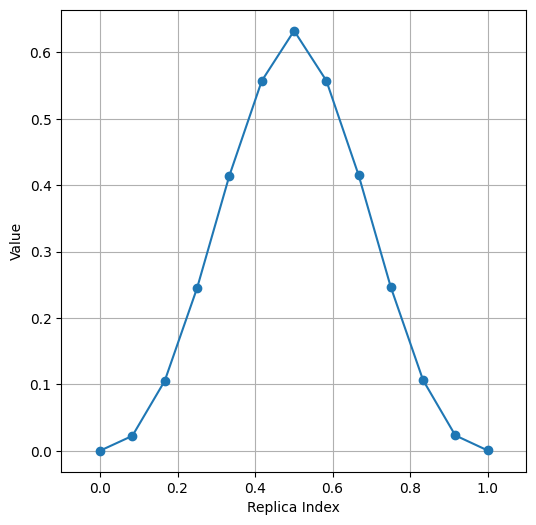

energy barrier: 0.6328000000003158


In [2]:
# Define the number of replicas
num_replicas = 13

# Read the log data from the file
with open('log.lammps', 'r') as file:
    log_data = file.read()

# Extract the last occurrence of RD and PE values for each replica
replica_indices = []
rd_values_list = []
pe_values_list = []

# Construct the regular expression pattern based on the number of replicas
pattern_str = r'\s+\d+\s+[\d.e+-]+\s+[\d.e+-]+\s+[\d.e+-]+\s+[\d.e+-]+\s+[\d.e+-]+\s+[\d.e+-]+\s+[\d.e+-]+\s+[\d.e+-]+'
for _ in range(num_replicas):
    pattern_str += r'\s+([\d.e+-]+)\s+([\d.e+-]+)'
pattern = re.compile(pattern_str)

matches = pattern.findall(log_data)
for matched in matches:
    rd_values_list.append([float(matched[i * 2]) for i in range(num_replicas)])
    pe_values_list.append([float(matched[i * 2 + 1]) for i in range(num_replicas)])

replica_indices = list(range(1, num_replicas + 1))

# Plot the reaction coordinate and potential energy 
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

n_matches = len(matches)
colors = plt.cm.cividis(np.arange(n_matches)/n_matches)

for i_step, pe_values in enumerate(pe_values_list):
    pe_values_relative = np.array(pe_values) - np.min(pe_values)
    # ax.plot(rd_values_list[i_step], pe_values_relative, marker='o', linestyle='-', color=colors[i_step], alpha=((i_step+1)/n_matches)**2)
    
pe_values_relative = np.array(pe_values) - np.min(pe_values)
ax.plot(rd_values_list[i_step], pe_values_relative, marker='o', linestyle='-', color='C0', alpha=((i_step+1)/n_matches)**2)

ax.set_xlabel('Replica Index')
ax.set_ylabel('Value')
ax.set_xlim([-0.1,1.1])
# ax.set_ylim([0,2])
plt.grid(True)
plt.show()

print(f"energy barrier: {np.max(pe_values) - np.min(pe_values)}")